In [205]:
# Import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import h5py
import math
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from matplotlib import cm

In [207]:
# print("Current working directory:", os.getcwd())

In [209]:
goldenRatio = (5**.5 - 1) / 2.

In [211]:
'''
    Truncate colors from continuous color palette
'''

def obtain_colors(number_of_lines, palette):
    color_interval = np.linspace(0, 1, number_of_lines)
    colors = [palette(x) for x in color_interval]
    return colors

In [213]:
'''
    A simple function to extrapolate data from HDF5 file
'''

def data_extrapolation(file_name, label):
    tmp_file = h5py.File(file_name, "r")
    print(tmp_file.keys())
    if label not in tmp_file.keys():
        print("Error: key doesn't exist!")
    else:
        tmp_Sz = np.array(tmp_file[label]).transpose()
    print(tmp_Sz.shape)
    return tmp_Sz

In [215]:
'''
    Truncate colors from continuous color palette
'''

def obtain_color(number_of_lines, palette):
    color_interval = np.linspace(0, 1, number_of_lines)
    colors = [palette(x) for x in color_interval]
    return colors

In [294]:
color = obtain_color(12, cm.gist_heat_r)

In [221]:
Czz1 = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_tau0.1_epsilon1E-8.h5", "Czz_unequaltime")

<KeysViewHDF5 ['Bond', 'Czz', 'Czz_unequaltime', 'Psi', 'Sz']>
(1000, 200)


In [223]:
Czz2 = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_tau0.1_epsilon1E-10.h5", "Czz_unequaltime")

<KeysViewHDF5 ['Bond', 'Czz', 'Czz_unequaltime', 'Psi', 'Sz']>
(1000, 200)


In [229]:
Czz_tau005 = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_tau0.05_epsilon1E-10.h5", "Czz_unequaltime")

<KeysViewHDF5 ['Bond', 'Czz', 'Czz_unequaltime', 'Psi', 'Sz']>
(2000, 200)


In [402]:
Czz_tau002 = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_tau0.02_epsilon1E-8.h5", "Czz_unequaltime")

<KeysViewHDF5 ['Bond', 'Czz', 'Czz_unequaltime', 'Psi', 'Sz']>
(5000, 200)


In [231]:
# Czz_TD_tau002 = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_tau0.02.h5", "Czz_unequaltime")

In [233]:
# label = [r"$t=10, \Delta\tau=0.1$", r"$t=20$", r"$t=30$", r"$t=40$", r"$t=50$", r"$t=60$", r"$t=70$", r"$t=80$", r"$t=90$", r"$t=100$"]
# label_tau002 = [r"$t=10, \Delta\tau=0.02$", r"$t=20$", r"$t=30$", r"$t=40$", r"$t=50$", r"$t=60$", r"$t=70$", r"$t=80$", r"$t=90$", r"$t=100$"]

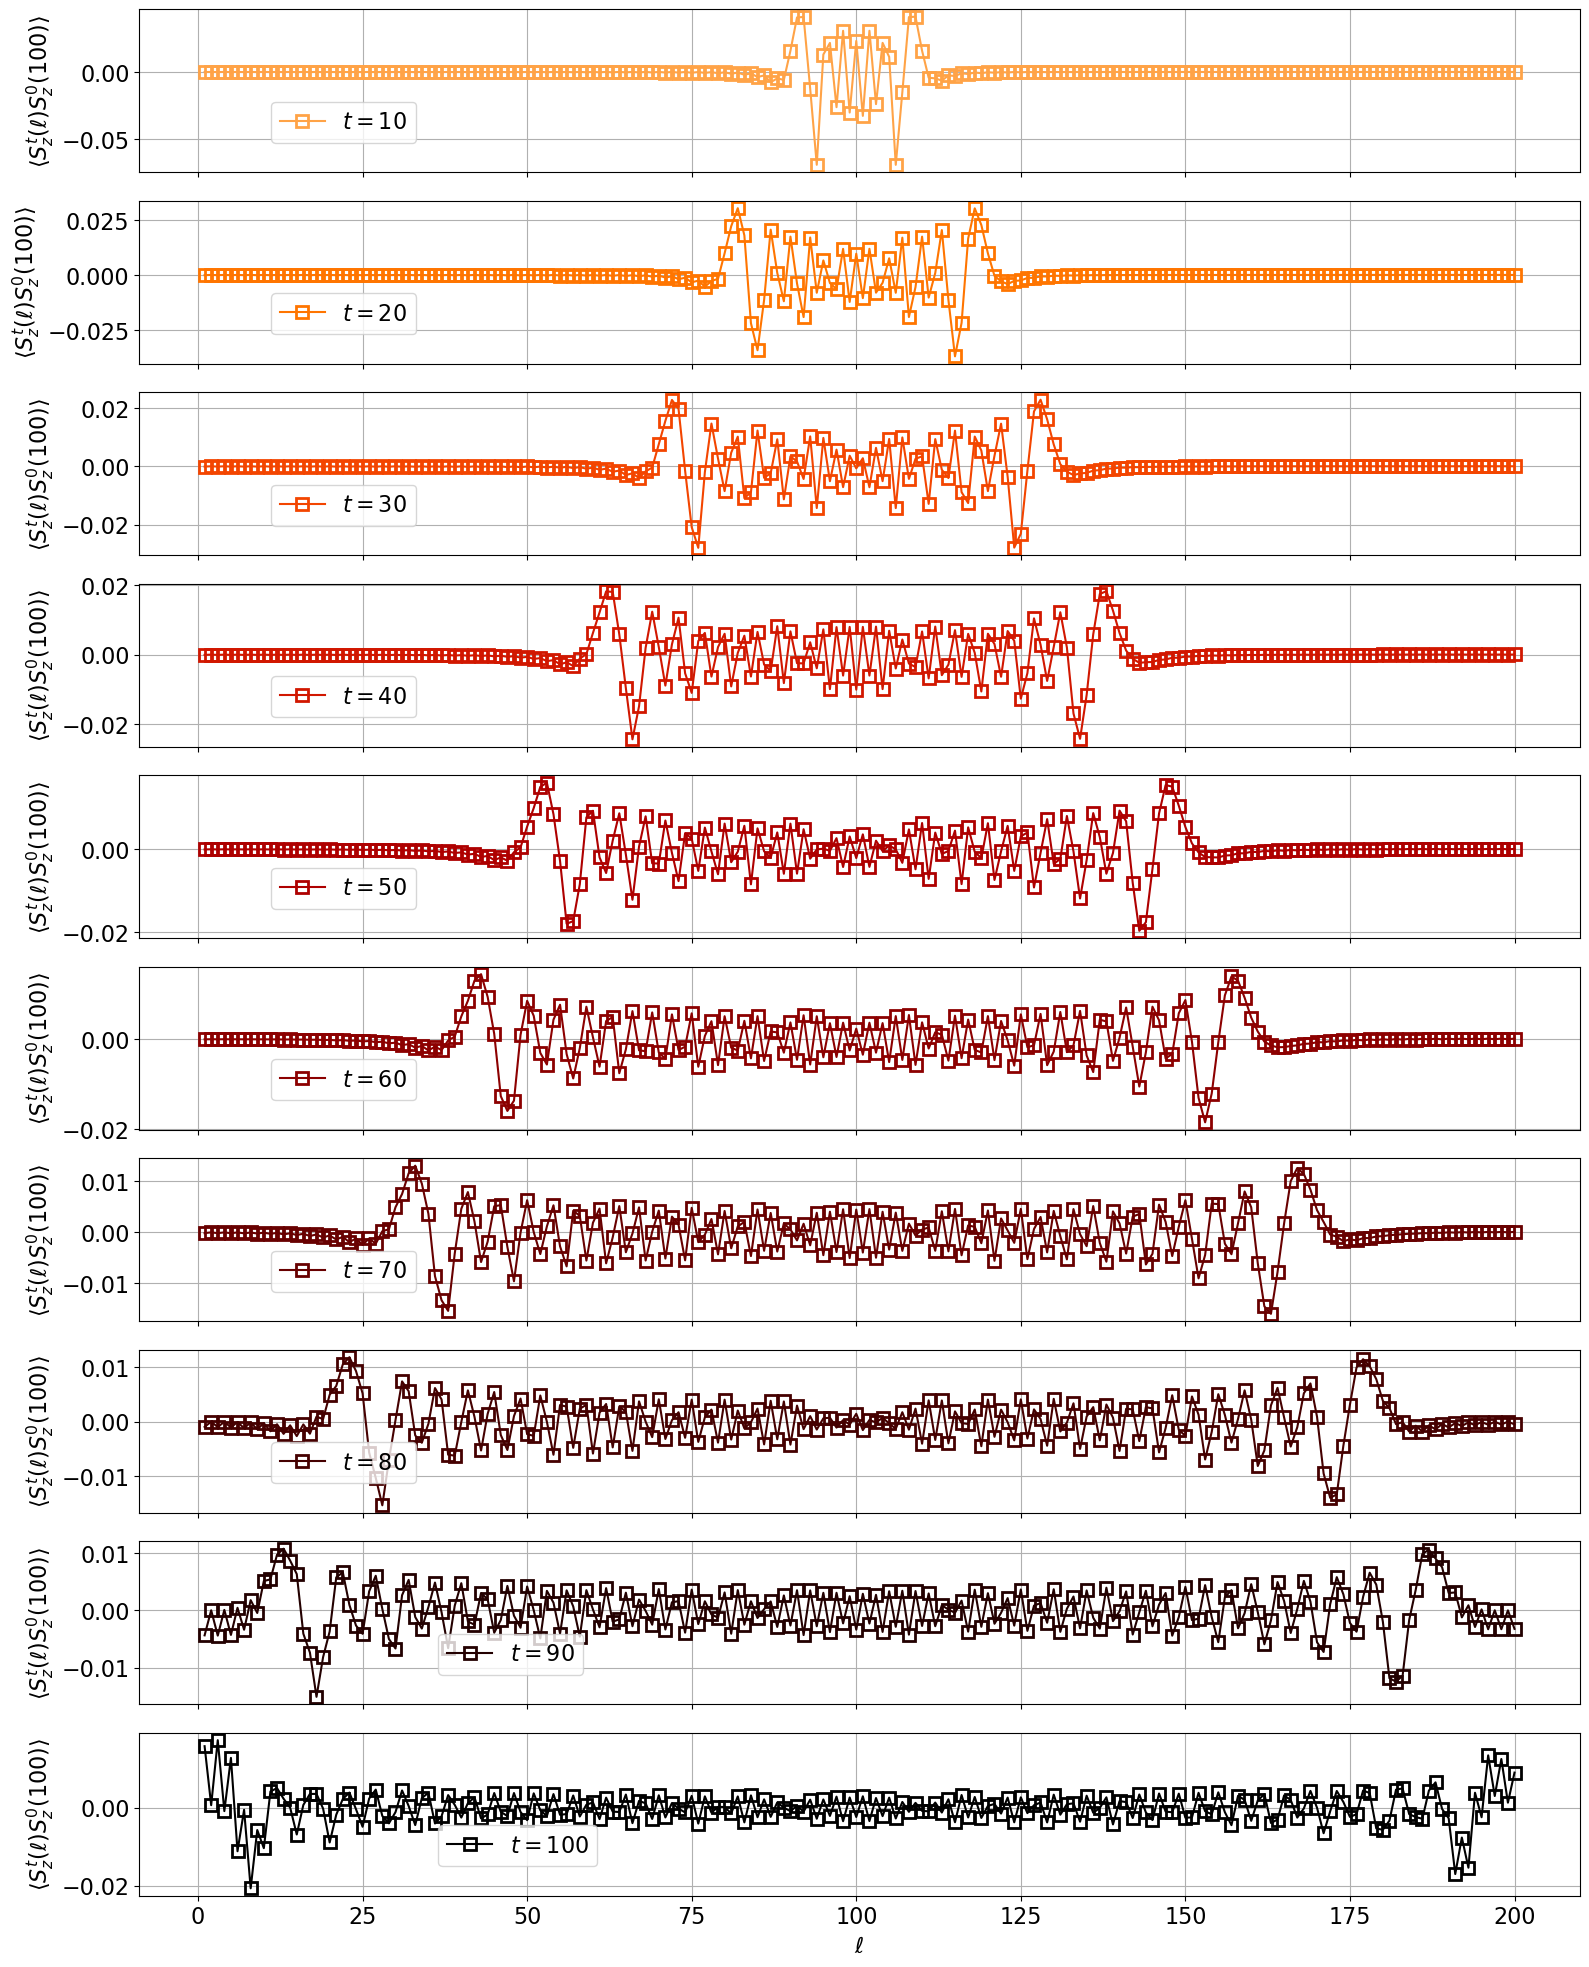

In [57]:
'''
    Analyze the \Delta\tau dependence of real-time dynamics for the kicked Ising model
'''

fig = plt.figure(figsize = (16, 32 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 10, ncols = 1, figure = fig)

for index in range(10):
    ax = fig.add_subplot(spec[index, 0])
    ax.plot(np.arange(1, 201), Czz_TD[(index + 1) * 100 - 1, :].real, color = color[index + 2], \
            marker = "s", markersize = 8, markeredgewidth = 2, markerfacecolor = "none", label = label[index])
    
    if index != 9:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("$\ell$", fontsize = 16)

    ax.legend(frameon = True, fontsize = 16, bbox_to_anchor = [0.2, 0.5], bbox_transform = ax.transAxes)
    ax.set_ylabel(r'$\langle S_{z}^{t}(\ell)S_{z}^{0}(100) \rangle$', fontsize = 16)    
    ax.tick_params(axis = "both", which = "major", labelsize = 16)
    ax.grid()  

# plt.savefig('Figures/XX_TEBD_N200_T100_Time_Dependent_Czz.pdf')

In [255]:
# Czz_tau005[-6 : -1, 99]

In [257]:
# Czz_tau005[-6 : -1, 125]

In [259]:
# Czz_tau005[-6 : -1, 175]

In [426]:
# \Delta\tau = 0.1, \epsilon = 10^{-8}
Czz1[-6 : , 99]

array([-0.00226917-0.00153291j, -0.00252885-0.0010123j ,
       -0.0026741 -0.00045082j, -0.00269923+0.00012738j,
       -0.00260348+0.00069755j, -0.00239111+0.0012353j ])

In [428]:
# \Delta\tau = 0.1, \epsilon = 10^{-10}
Czz2[-6 : , 99]

array([-0.00219609-0.00152849j, -0.00246228-0.00100865j,
       -0.00261408-0.00044643j, -0.00264546+0.000134j  ,
       -0.00255538+0.00070781j, -0.0023478 +0.00125049j])

In [432]:
# \Delta\tau = 0.05, \epsilon = 10^{-10}
Czz_tau005[-6 : , 99]

array([-0.00264479-2.31184948e-05j, -0.00263115+2.67110130e-04j,
       -0.00258722+5.54235239e-04j, -0.00251347+8.35180691e-04j,
       -0.00241071+1.10693669e-03j, -0.00228003+1.36659006e-03j])

In [438]:
Czz_tau005.shape

(2000, 200)

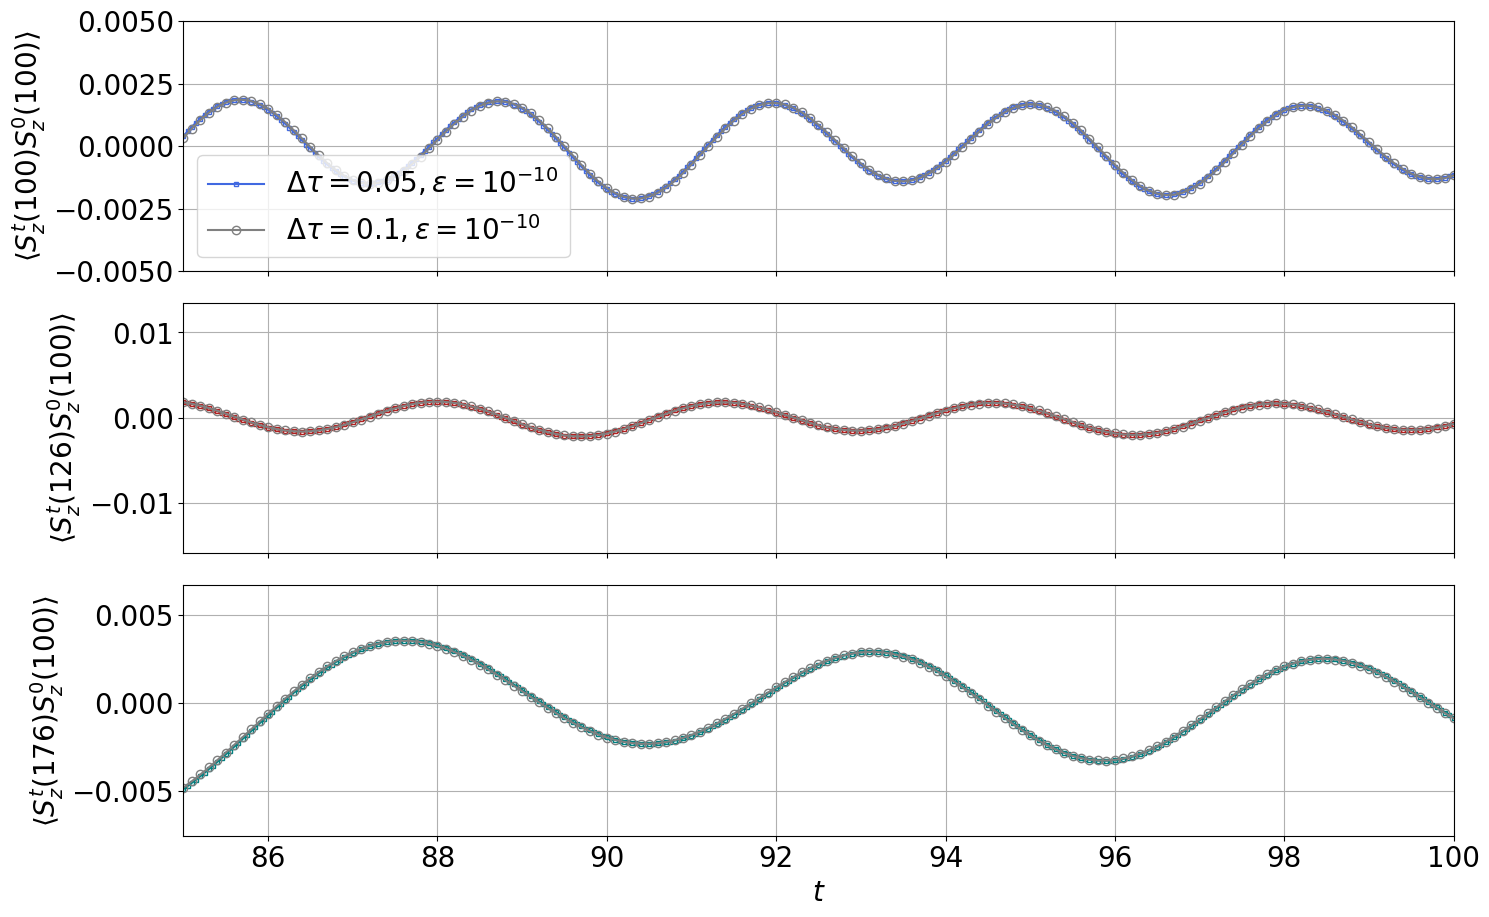

In [436]:
'''
    Analyze the \Delta\tau dependence of real-time dynamics for the XX model
'''

fig = plt.figure(figsize = (15, 15 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 3, ncols = 1, figure = fig)


ax = fig.add_subplot(spec[0, 0])
ax.plot(np.arange(1, 2001) * 0.05, Czz_tau005[:, 99].real / 2, color = "royalblue", \
        marker = "s", markersize = 3, markeredgewidth = 1, markerfacecolor = "none", label = r"$\Delta\tau=0.05, \epsilon=10^{-10}$")
ax.plot(np.arange(1, 1001) * 0.1, Czz2[:, 99].real / 2, color = "gray", \
        marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"$\Delta\tau=0.1, \epsilon=10^{-10}$")

ax.set_xlim(85, 100)
ax.set_ylim(-0.005, 0.005)
ax.set_xticklabels([])
ax.set_ylabel(r'$\langle S_{z}^{t}(100)S_{z}^{0}(100) \rangle$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  


ax = fig.add_subplot(spec[1, 0])
ax.plot(np.arange(1, 2001) * 0.05, Czz_tau005[:, 125].real / 2, color = "firebrick", \
        marker = "s", markersize = 3, markeredgewidth = 1, markerfacecolor = "none")
ax.plot(np.arange(1, 1001) * 0.1, Czz2[:, 125].real / 2, color = "gray", \
        marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none")

ax.set_xlim(85, 100)
ax.set_xticklabels([])
ax.set_ylabel(r'$\langle S_{z}^{t}(126)S_{z}^{0}(100) \rangle$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.grid()  


ax = fig.add_subplot(spec[2, 0])
ax.plot(np.arange(1, 2001) * 0.05, Czz_tau005[:, 175].real / 2, color = "teal", \
        marker = "s", markersize = 3, markeredgewidth = 1, markerfacecolor = "none",)
ax.plot(np.arange(1, 1001) * 0.1, Czz2[:, 175].real / 2, color = "gray", \
        marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none")

ax.set_xlim(85, 100)
ax.set_xlabel(r'$t$', fontsize = 20)
ax.set_ylabel(r'$\langle S_{z}^{t}(176)S_{z}^{0}(100) \rangle$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.grid()  

# plt.savefig('Figures/XX_TEBD_N200_T100_Czz_tau005_Zoom.pdf')

In [448]:
Czz = Czz_tau005[19 : : 20, :].real
Czz.shape

(100, 200)

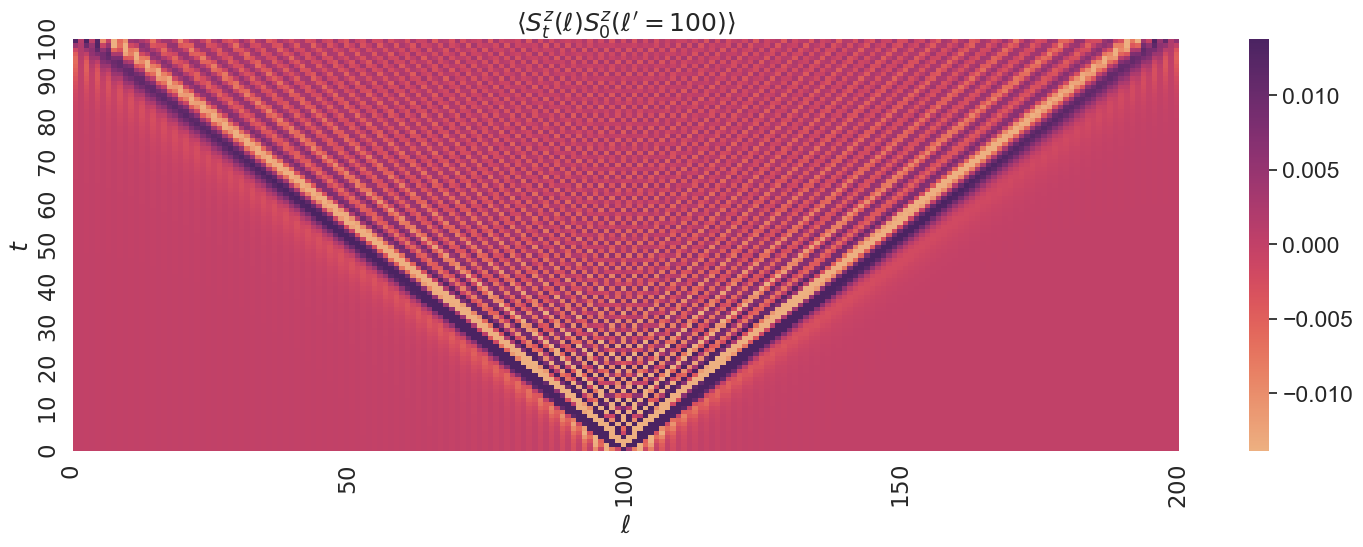

In [568]:
# Plot the time-dependent spin correlation function and visualize the light-cone structure
import seaborn as sns
sns.set(font_scale = 1.5)

fig = plt.figure(figsize = (15, 25 * goldenRatio), tight_layout = True)
ax = fig.add_subplot(spec[0, 0])

ax = sns.heatmap(Czz, cmap = "flare", cbar = True, annot = False, robust = True)
ax.set_xticks(np.arange(0, 201, 50))
ax.set_xticklabels([r"$0$", r"$50$", r"$100$", r"$150$", r"$200$"])
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticklabels([r"$0$", r"$10$", r"$20$", r"$30$", r"$40$", r"$50$", r"$60$", r"$70$", r"$80$", r"$90$", r"$100$"])
ax.set(xlabel = r"$\ell$", ylabel = r"$t$", title = r"$\langle S^{z}_{t}(\ell) S^{z}_{0}(\ell^{\prime} = 100) \rangle$")
ax.invert_yaxis()

# plt.savefig('Figures/XX_TEBD_N200_T100_Czz_tau005_Light_Cone.pdf')

In [574]:
# Define parameters used in the double Fourier transform
t = 100
tau = 0.05
N = t / tau
omega = np.arange(0, 2 * math.pi, 2 * math.pi / N)
omega.shape

(2000,)

In [576]:
# Introduce the damping factor to prevent large spectral leakage due to the finite interval
eta = 0.2

In [598]:
# Transform from the real space to the momentum space
sites = 200
reference = 100
k = 2 * math.pi / sites * np.arange(-sites//2 , sites//2, 1)
k.shape

(200,)

In [600]:
# Initialize the structure factor
Szz = np.zeros([k.shape[0], omega.shape[0]])
Szz.shape

(200, 2000)

In [ ]:
# Calculate the structure factor
for index1 in range(k.shape[0]):
    for index2 in range(omega.shape[0]):
        print(index1, index2)
        for index3 in range(sites):
            for index4 in range(int(N)):
                Szz[index1, index2] += 2 * math.pi / (sites * t) * np.exp(-1j * index1 * (index3 - reference)) * np.exp(1j * (index2 + 1j * eta) * index4) * 2 * Czz_tau005[index4, index3].real

/var/folders/6y/4y4692vx5wb73rsgl28m47k40000gn/T/ipykernel_5457/3865260662.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  Szz[index1, index2] += 2 * math.pi / (sites * t) * np.exp(-1j * index1 * (index3 - reference)) * np.exp(1j * (index2 + 1j * eta) * index4) * 2 * Czz_tau005[index4, index3]


In [374]:
chi1 = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_tau0.1_epsilon1E-8.h5", "Bond")
chi1.shape

<KeysViewHDF5 ['Bond', 'Czz', 'Czz_unequaltime', 'Psi', 'Sz']>
(1000, 199)


array([  2.,   4.,   8.,  13.,  20.,  22.,  24.,  33.,  34.,  40.,  43.,
        47.,  53.,  56.,  63.,  66.,  72.,  75.,  80.,  80.,  85.,  85.,
        88.,  88.,  92.,  92.,  95.,  94.,  99.,  96., 101.,  99., 104.,
       100., 105., 101., 108., 104., 108., 105., 109., 107., 111., 108.,
       113., 111., 114., 113., 115., 114., 118., 116., 119., 117., 120.,
       119., 121., 122., 121., 123., 122., 125., 124., 127., 124., 129.,
       124., 130., 125., 132., 125., 134., 126., 135., 127., 136., 127.,
       137., 129., 139., 132., 141., 134., 144., 135., 144., 136., 148.,
       138., 149., 141., 153., 146., 159., 154., 168., 164., 179., 174.,
       182., 173., 174., 161., 164., 153., 158., 147., 154., 141., 149.,
       139., 147., 136., 145., 135., 142., 133., 140., 131., 138., 128.,
       136., 127., 135., 126., 133., 125., 133., 126., 132., 125., 130.,
       124., 129., 124., 127., 123., 124., 122., 123., 121., 121., 120.,
       119., 119., 117., 118., 115., 117., 114., 11

In [376]:
chi2 = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_tau0.1_epsilon1E-10.h5", "Bond")
chi2[-1, :]

<KeysViewHDF5 ['Bond', 'Czz', 'Czz_unequaltime', 'Psi', 'Sz']>
(1000, 199)


array([  2.,   4.,   8.,  16.,  26.,  39.,  44.,  55.,  62.,  72.,  82.,
        87., 101., 101., 120., 130., 139., 153., 152., 170., 170., 183.,
       184., 193., 200., 204., 210., 217., 223., 228., 232., 238., 240.,
       252., 252., 265., 265., 277., 273., 284., 281., 289., 285., 293.,
       289., 297., 294., 303., 302., 310., 310., 314., 318., 318., 321.,
       322., 327., 323., 328., 324., 331., 327., 334., 330., 334., 330.,
       334., 331., 335., 333., 338., 334., 339., 335., 341., 338., 345.,
       341., 349., 345., 353., 347., 357., 348., 358., 349., 358., 349.,
       358., 351., 362., 356., 369., 366., 383., 383., 403., 404., 420.,
       410., 413., 396., 395., 374., 375., 361., 365., 354., 362., 352.,
       360., 350., 359., 348., 357., 347., 354., 347., 351., 343., 347.,
       339., 343., 336., 340., 333., 336., 333., 336., 332., 333., 331.,
       332., 328., 332., 328., 333., 328., 331., 326., 328., 324., 326.,
       321., 322., 317., 315., 312., 307., 306., 29

In [378]:
chi_tau005 = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_tau0.05_epsilon1E-10.h5", "Bond")
chi_tau005[-1, :]

<KeysViewHDF5 ['Bond', 'Czz', 'Czz_unequaltime', 'Psi', 'Sz']>
(2000, 199)


array([  2.,   4.,   8.,  16.,  24.,  35.,  40.,  47.,  50.,  59.,  70.,
        77.,  85.,  90., 102., 103., 116., 122., 128., 140., 142., 156.,
       150., 167., 161., 174., 168., 180., 176., 184., 181., 188., 189.,
       191., 195., 197., 202., 201., 206., 205., 212., 213., 220., 221.,
       226., 227., 229., 231., 232., 237., 236., 241., 239., 246., 243.,
       250., 247., 255., 250., 259., 253., 262., 255., 265., 259., 269.,
       262., 272., 266., 276., 269., 278., 272., 281., 274., 284., 278.,
       289., 282., 292., 287., 295., 291., 300., 297., 304., 301., 308.,
       305., 312., 311., 318., 320., 329., 334., 344., 354., 365., 370.,
       373., 368., 359., 347., 340., 328., 325., 315., 315., 306., 310.,
       302., 306., 298., 303., 295., 300., 290., 296., 286., 292., 281.,
       288., 278., 285., 275., 283., 272., 279., 269., 275., 265., 271.,
       261., 268., 258., 264., 253., 262., 253., 258., 249., 254., 245.,
       250., 242., 247., 240., 242., 235., 238., 23

In [384]:
label = [r"$\Delta\tau = 0.1; \epsilon = 10^{-10}$", r"$\Delta\tau = 0.05; \epsilon = 10^{-10}$"]
text_label = [r"$t=20$", r"$t=40$", r"$t=60$", r"$t=80$", r"$t=100$"]

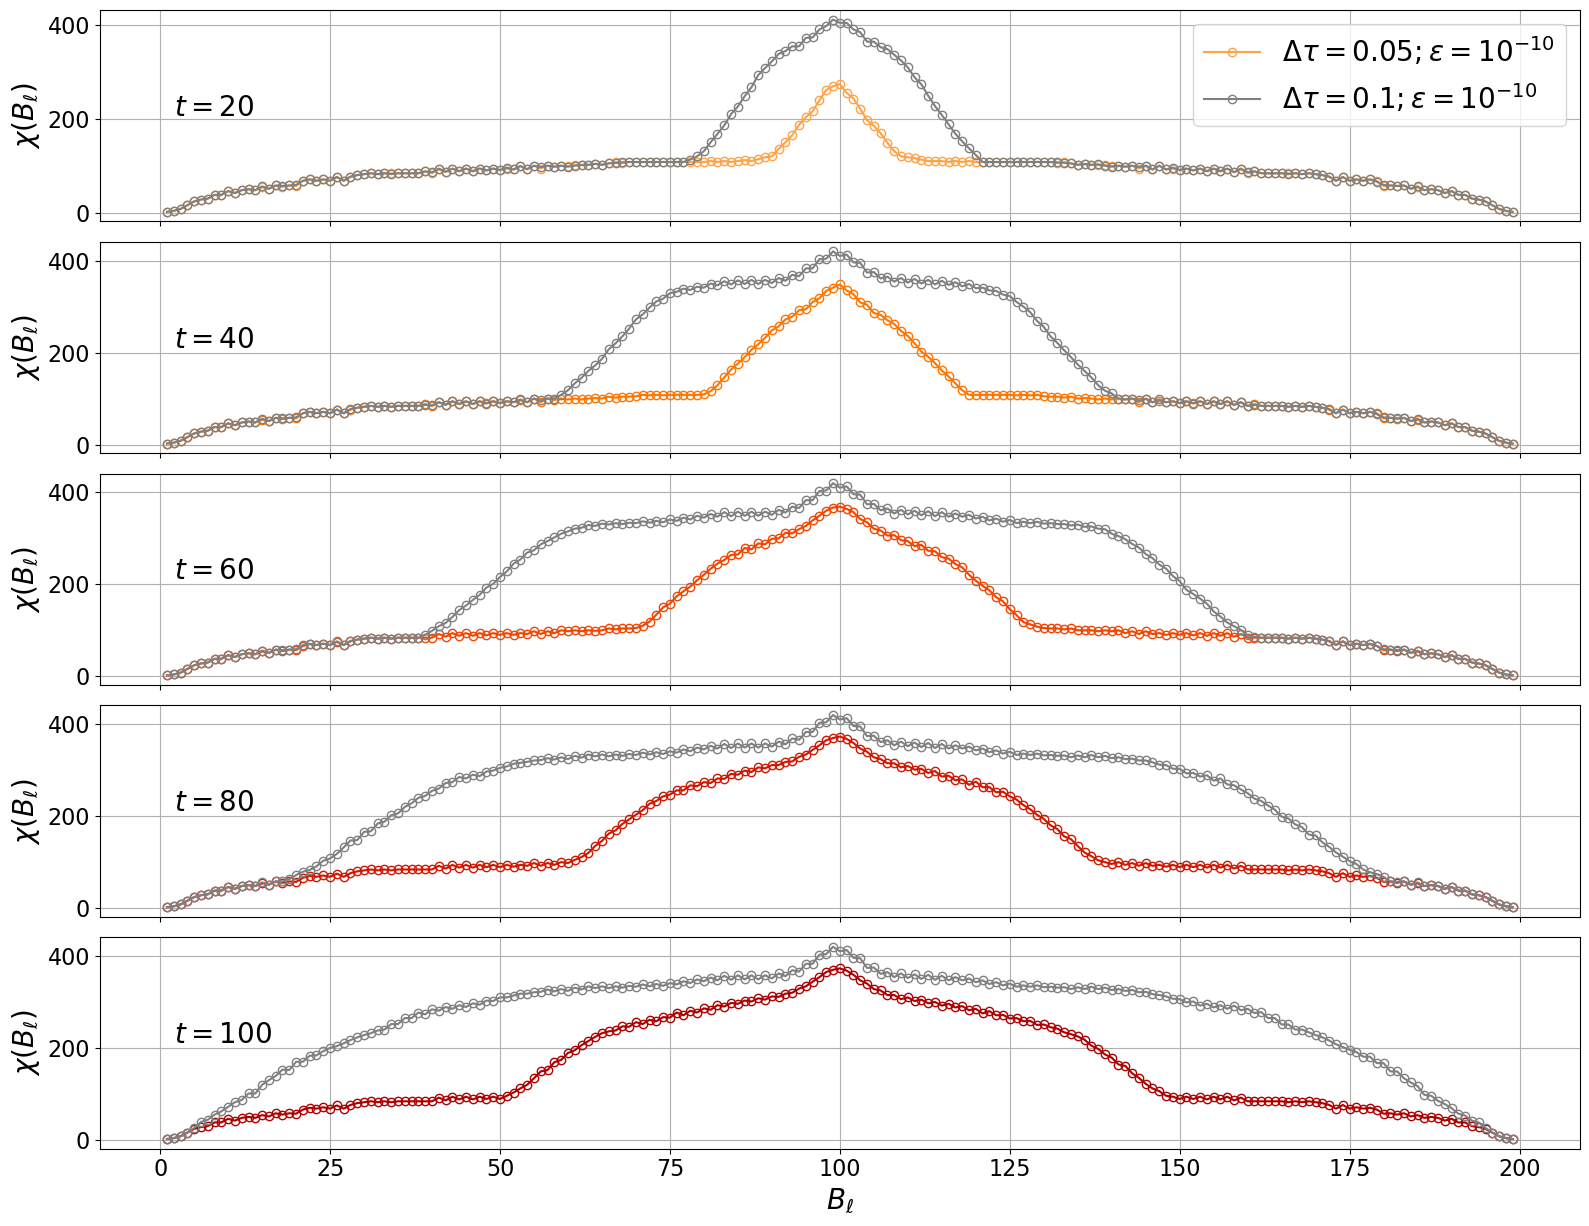

In [392]:
'''
    Analyze the \Delta\tau dependence of real-time dynamics for the kicked Ising model
'''

fig = plt.figure(figsize = (16, 20 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 5, ncols = 1, figure = fig)

for index in range(5):
    ax = fig.add_subplot(spec[index, 0])
    # ax.plot(np.arange(1, 200), chi_tau002[(index + 1) * 500 - 1, :].real, color = color[index + 2], \
    #        marker = "o", markersize = 6, markerfacecolor = "none", label = label_tau002[index])
    ax.plot(np.arange(1, 200), chi_tau005[2 * (index + 1) * 100 - 1, :].real, color = color[index + 2], \
           marker = "o", markersize = 6, markerfacecolor = "none", label = label[1])
    ax.plot(np.arange(1, 200), chi2[2 * (index + 1) * 100 - 1, :].real, color = "gray", \
           marker = "o", markersize = 6, markerfacecolor = "none", label = label[0] )
    
    if index != 4:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("$B_{\ell}$", fontsize = 20)

    if index == 0:
        ax.legend(frameon = True, fontsize = 20, ncol = 1)

    ax.text(0.05, 0.5, text_label[index], transform = ax.transAxes, fontsize = 20)
    ax.set_ylabel(r'$\chi(B_{\ell})$', fontsize = 20)    
    ax.tick_params(axis = "both", which = "major", labelsize = 16)
    ax.grid()  

plt.savefig('Figures/XX_Model_TEBD_N200_T100_chi_tau005.pdf')

In [368]:
# '''
#     Store the time-dependent spin correlation function to compare the exact solution
# '''

# file = open("Data/XX_Model_Time_Dependent_Correlation_Function_tau002.txt", "w")

# file.write(r"<S_{z}^{t}(100) S_{z}^{100}>" + " " * 25 + r"<S_{z}^{t}(126) S_{z}^{100}>" + " " * 25 \
#                + r"<S_{z}^{t}(176) S_{z}^{100}>" + "\n")
# for index in range(Czz_TD.shape[0]):
#     file.write("{0.real:.16f} + {0.imag:.16f}i".format(Czz_TD_tau002[index, 99])  + " " * 12 + \
#                "{0.real:.16f} + {0.imag:.16f}i".format(Czz_TD_tau002[index, 125]) + " " * 12 + \
#                "{0.real:.16f} + {0.imag:.16f}i".format(Czz_TD_tau002[index, 175]) + "\n")
# file.close()